In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, 
                  n_features=20, 
                  centers=15, 
                  cluster_std=2.0, 
                  shuffle=True, 
                  random_state=0
                 )
variables = ['辛さ','重厚','スパイシー','果実味','コク','酸味','落ち着き','香り',
             '華やか','ジューシー','熟成','透明感','シャープ','力強い','フレッシュ',
             '渋み','苦味','樽','エキゾチック','粘性']
name = list(map(str,[i for i in range(100)]))
df = pd.DataFrame(X, columns=variables, index=name)

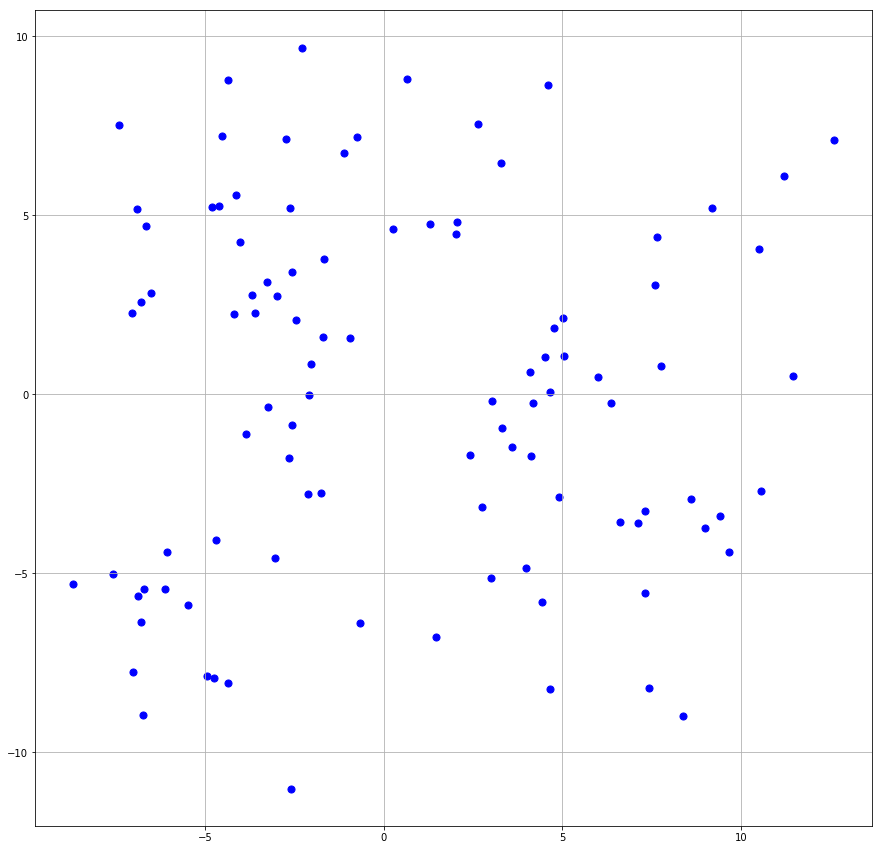

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1],c='b',marker='o',s=50)
plt.grid()
plt.show()

In [3]:
from sklearn.cluster import KMeans
#1.クラスタ数kを決める 
#2.各サンプルを最も近い中心点に割り当てクラスタを作る。
#3.クラスタの実際の中心（＝平均）を計算し、そこを新たな中心点とする（中心点の更新）
#4.2〜3を繰り返す。割り当てられるサンプルが変わらなくなったら終了。または、更新時に動く距離が許容値以下になったり、決められた最大回数まで繰り返したら終了。

km=KMeans(n_clusters=15,#形成するクラスタの数と生成する重心の数。
          init='k-means++',#初期化の方法{'k-means++'、 'random'またはndarray}
                        #デフォルト 'k-means++'
                        #'k-means ++'：収束をスピードアップするために、k平均クラスタリングのクラスタ中心の初期値をスマートな方法で選択します。
                        #'random'：最初の重心のデータからk個の観測値（行）をランダムに選択します。
                        #ndarrayが渡された場合、その形状は（n_clusters、n_features）でなければならず、初期中心を与えます。
          n_init=10,#k-means自体の回数（アルゴリズムが異なる重心シードで実行される回数）。
          max_iter=300,#2〜3を繰り返す最大反復回数。
          tol=1e-04,#コンバージェンス（収束）を宣言する慣性に関する相対許容誤差。デフォルト＝1e-04(0.0001)
          random_state=0#中心点の初期値のための乱数の状態を固定（これでKMeansクラスを実行するたびに違う結果になることはない）
         )
y_km=km.fit_predict(X)
print(y_km)

[ 4  1  3  2 11  6 12  7 13  0  6 10  6  2  8  5  6  9 12  8  8  1  2 13
  7  3  1  8  6  2  3 13 10  2  4  5 12  3  0  1  7 14  4  4  0 14  1 11
 12  8  3  5 13 14 12 12  6 14  1  7 11  9 10  5 11  5  1 13 11 10 10 10
  4  7 12 11  9  8  4  2 13  4 14 13 10  3  3  9  5  5  9  2  0  6  0  9
 11 14  7  0]


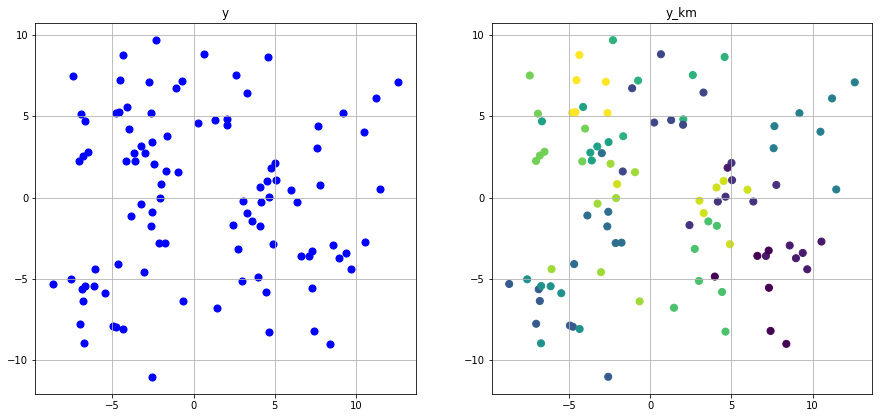

In [4]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title('y')
plt.scatter(X[:,0],X[:,1],c='b',marker='o',s=50)
plt.grid()

plt.subplot(2,2,2)
plt.title('y_km')
plt.scatter(X[:,0], X[:,1], c=y_km , marker='o', s=50)
plt.grid()

plt.show()

### エルボー図
> クラスタ数=15でSSEが収束

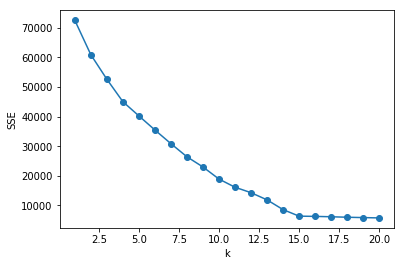

In [5]:
SSE=[]
for i in range(1,21):
    km=KMeans(n_clusters=i,
              init='random',
              n_init=100,
              max_iter=300,
              tol=1e-04,
              random_state=0
             )
    km.fit(X)
    SSE.append(km.inertia_)

plt.plot(range(1,21),SSE,marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

### シルエット図
> クラスタ数=15が一番バランスがよい。
>0. クラスタの形状は総じて同じように見える。
>0. クラスタのシルエット係数の平均値=0.6（1に近くほど望ましい）
>0. すべてのクラスタがシルエット係数平均値より下回っていない。（クラスタ9はギリギリ？）

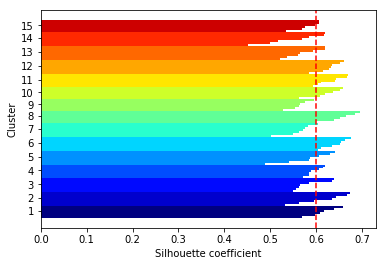

In [6]:
km=KMeans(n_clusters=15,
          #init='random', デフォルトのkmeans++を使う。
          n_init=10,
          max_iter=300,
          tol=1e-04,
          random_state=0
         )
y_km=km.fit_predict(X)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

cluster_labels = np.unique(y_km)#y_kmの要素の中で重複をなくす。

n_clusters = cluster_labels.shape[0]#配列の長さを返す。

silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')#シルエット係数を計算する。

y_ax_lower,y_ax_upper = 0,0
yticks=[]

for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color=cm.jet(i/n_clusters)#色の値をセットする。
    plt.barh(range(y_ax_lower,y_ax_upper),#水平の棒グラフ(horizontal bar_graph),底辺の範囲を指定。
             c_silhouette_vals,#棒の幅
             height=1.0,#棒の高さ
             edgecolor='none',
             color=color
            )
    yticks.append((y_ax_lower + y_ax_upper)/2)#クラスタラベルの表示位置を追加。
    y_ax_lower += len(c_silhouette_vals)#底辺の値に、棒の幅を追加。

silhouette_avg = np.mean(silhouette_vals)#シルエット係数の平均値
plt.axvline(silhouette_avg,color='red',linestyle='--')#係数の平均値に破線をひく。
plt.yticks(yticks,cluster_labels + 1)#クラスタラベルを表示する。
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

### 樹形図
> 縦軸の距離15あたりできれいに横並びのクラスタリングができているように見える。

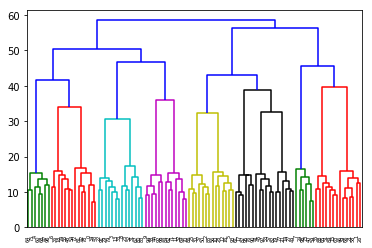

In [7]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_dender = dendrogram(row_clusters, labels=name)
plt.show()

>* 以上から、店舗に陳列すべきワインを１５種類とすると、特徴量を広くカバーしつつ効率的なラインナップとすることができそう。